# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data.

The NLSY97 collects extensive information on respondents' labor market behavior and educational experiences. The survey also includes data on the youths' family and community backgrounds to help researchers assess the impact of schooling and other environmental factors on these labor market entrants.

<center><img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPbRRK8cwJjPKdBWizxG-e4sLuPUtZb9izjA&usqp=CAU height=400></center>


###  Import Statements


In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Notebook Presentation

In [74]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [75]:
df_data = pd.read_csv('NLSY97_subset.csv')[['EARNINGS','S', 'EXP']]

## Understand the Dataset
    Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [76]:
df_data.shape

(2000, 3)

In [77]:
df_data.describe()

,EARNINGS,S,EXP
count,"2,000.00","2,000.00","2,000.00"
mean,18.87,14.58,6.72
std,11.95,2.74,2.84
min,2.00,6.00,0.00
25%,11.54,12.00,4.69
50%,15.75,15.00,6.63
75%,22.70,16.00,8.70
max,132.89,20.00,14.73


In [78]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  2000 non-null   float64
 1   S         2000 non-null   int64  
 2   EXP       2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [79]:
df_data.sample(5)

,EARNINGS,S,EXP
700,3.74,17,4.77
389,20.00,13,5.25
1148,39.74,16,5.58
861,12.21,11,6.90
1965,13.32,18,3.85


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [80]:
df_data.isna().values.sum()

0

In [81]:
df_data.duplicated().sum()

514

In [82]:
df_data.drop_duplicates(inplace=True)

## Descriptive Statistics

In [83]:
df_data.describe()

,EARNINGS,S,EXP
count,"1,486.00","1,486.00","1,486.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.66
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Data

<Figure size 1600x800 with 0 Axes>

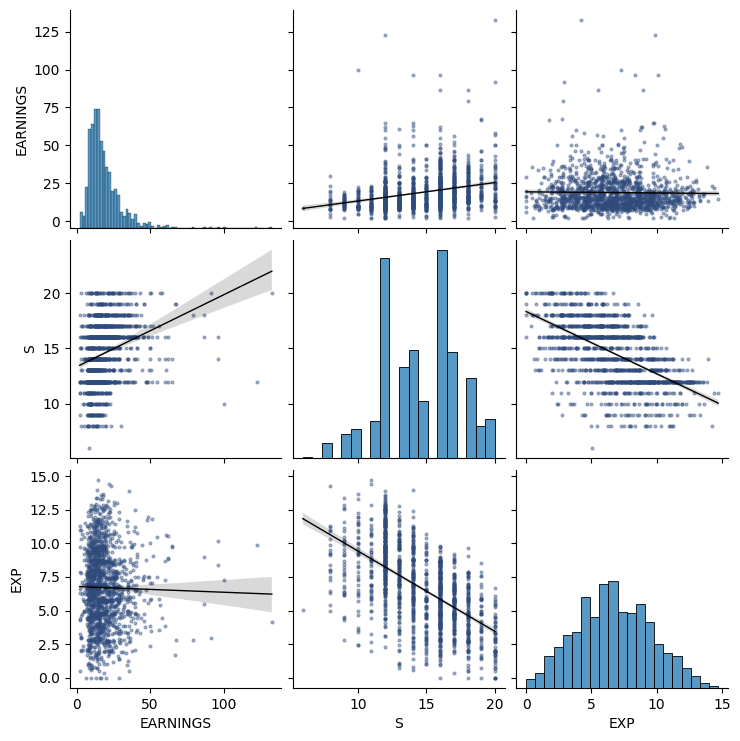

In [84]:
plt.figure(figsize=(8,4), dpi=200)
# with sns.axes_style("darkgrid"):
sns.pairplot(df_data,
                 kind='reg',
                 plot_kws={
                     'line_kws': {'color': 'black', 'lw': 1},
                     'scatter_kws': {'color': '#2f4b7c', 'alpha': 0.4, 's': 4}
                 })
plt.show()

<Figure size 2400x800 with 0 Axes>

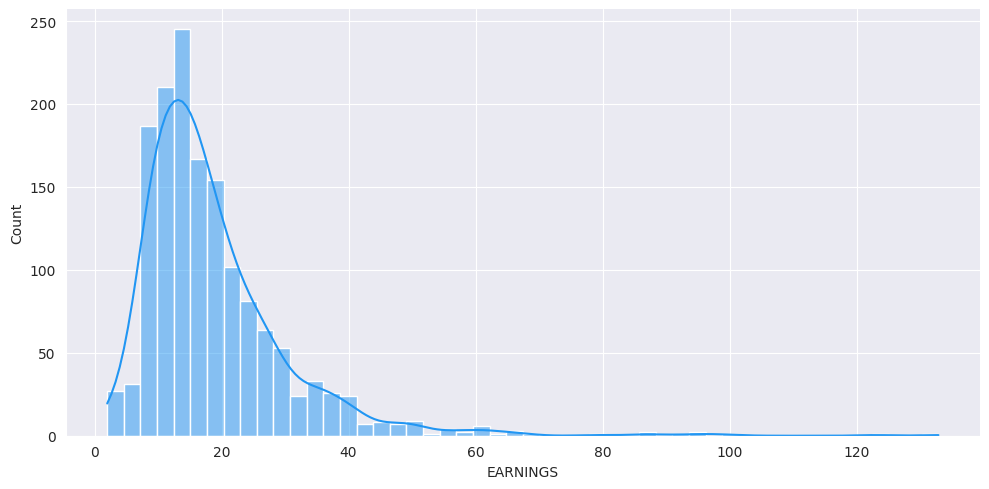

<Figure size 2400x800 with 0 Axes>

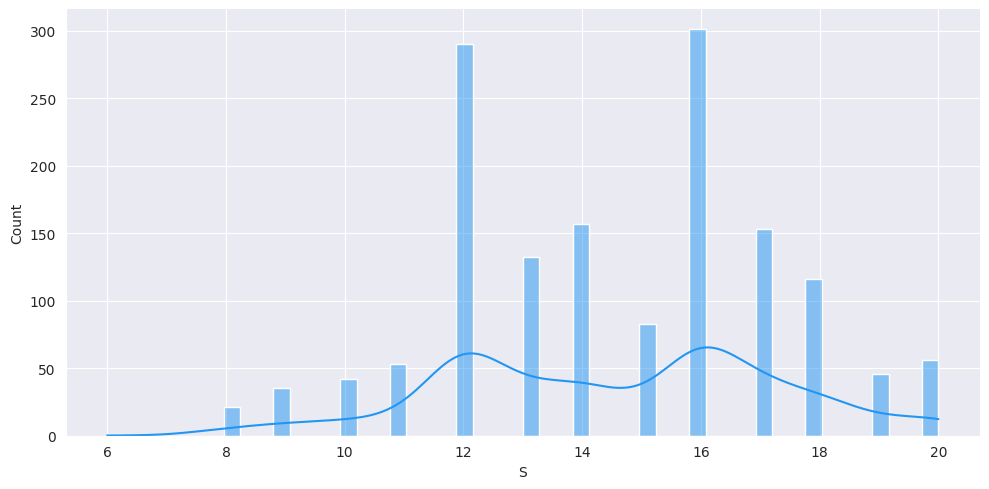

<Figure size 2400x800 with 0 Axes>

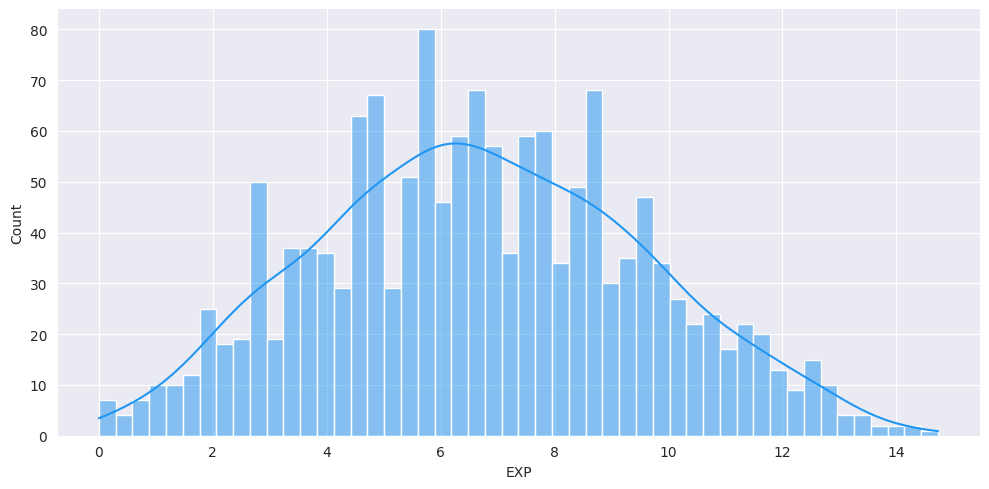

In [85]:
for column in df_data.columns.values:
    plt.figure(figsize=(12, 4), dpi=200)
    with sns.axes_style("darkgrid"):
        sns.displot(data=df_data, x=column, aspect=2, kde=True, color='#2196f3', bins=50)
    plt.show()

# Split Training & Test Dataset

* Here we keep 80% data for training and 20% data for testing the model. Which will enhance the output of the instruction  

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS', 'EXP'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)

In [87]:
train_pct = 100*len(X_train)/len(df_data.drop('EARNINGS' , axis=1))
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/df_data.drop('EARNINGS' , axis=1).shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


# Simple Linear Regression

We will create a model for simple regression using 'Years of Schooling' and 'Earnings' as variables. We can then use this model to predict the amount of dollars someone will earn based on the number of years of schooling they have completed.   

In [88]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.072


### Evaluate the Coefficients of the Model

In [89]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.19


In [90]:
expects = regr_coef.loc['S'].values[0]
print(f'The increment of earnings per hour for having an extra year of schooling is ${expects:.5}')

The increment of earnings per hour for having an extra year of schooling is $1.1938


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the predicted values and the true values inside y_train.

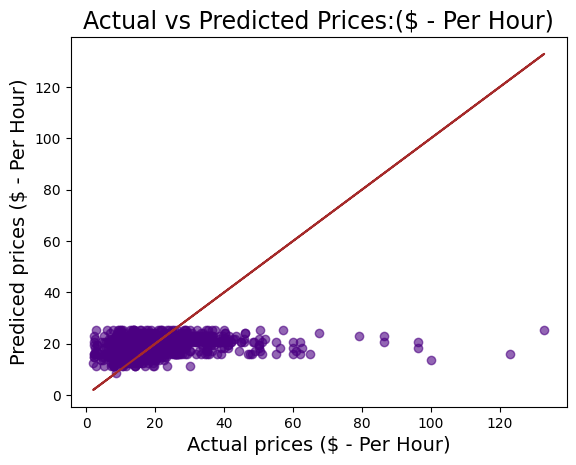

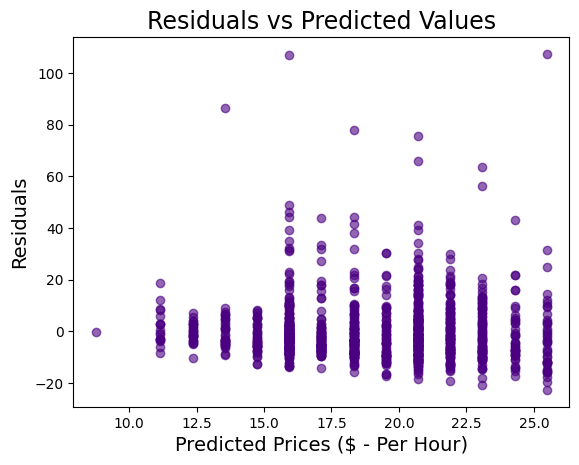

The absolute mean for the residuals of training data is 7.7472


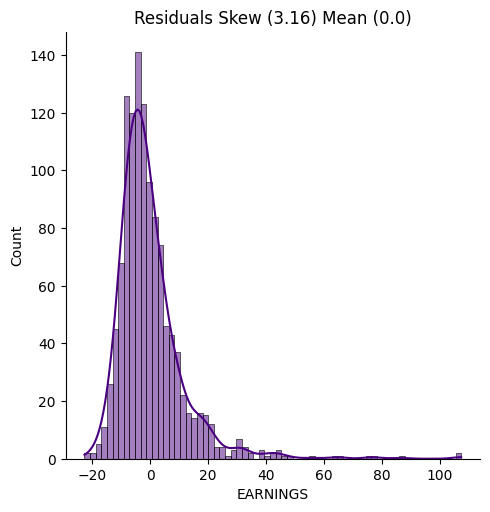

In [93]:
y_pred = regr.predict(X_train)
residuals = (y_train - y_pred)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=y_pred, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='brown')
plt.title(f'Actual vs Predicted Prices:($ - Per Hour)', fontsize=17)
plt.xlabel('Actual prices ($ - Per Hour)', fontsize=14)
plt.ylabel('Prediced prices ($ - Per Hour)', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=y_pred, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices ($ - Per Hour)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae = mean_absolute_error(y_train, y_pred)
print(f"The absolute mean for the residuals of training data is {mae:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

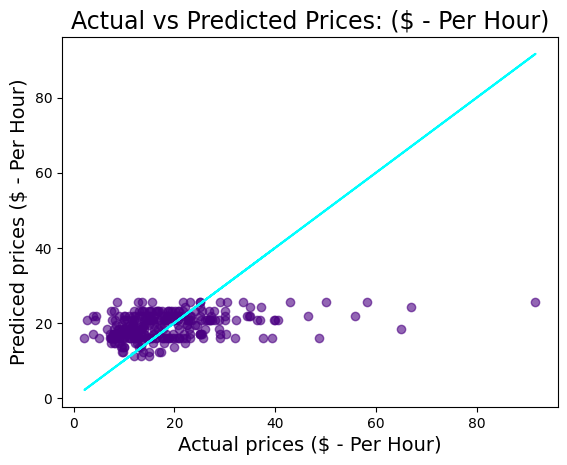

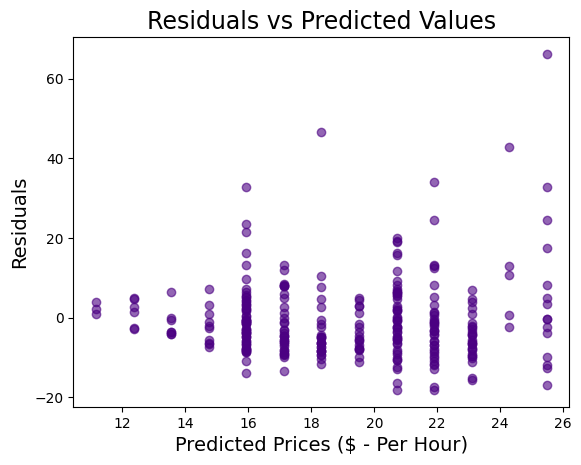

The absolute mean for the residuals of training data is 7.0297


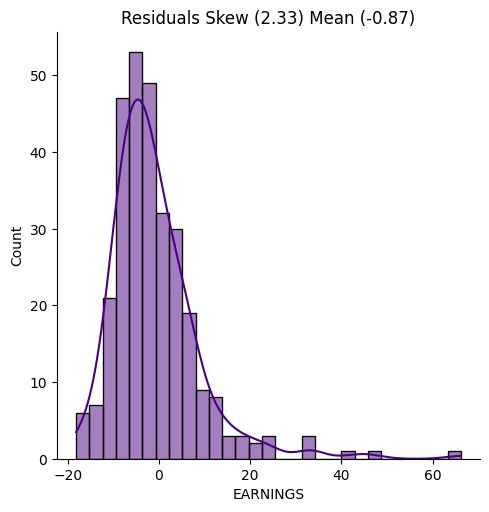

In [94]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: ($ - Per Hour)', fontsize=17)
plt.xlabel('Actual prices ($ - Per Hour)', fontsize=14)
plt.ylabel('Prediced prices ($ - Per Hour)', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices ($ - Per Hour)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data?

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_data[['S','EXP']], df_data.EARNINGS, test_size=0.2, random_state=1)

In [98]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.11


### Evaluate the Coefficients of the Model

In [99]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.80
EXP,1.03


### Analyse the Estimated Values & Regression Residuals

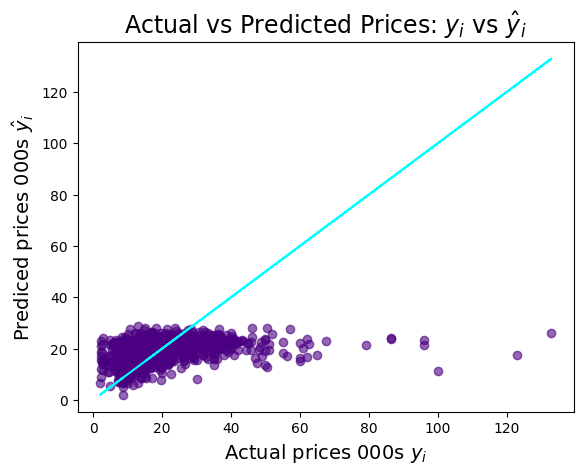

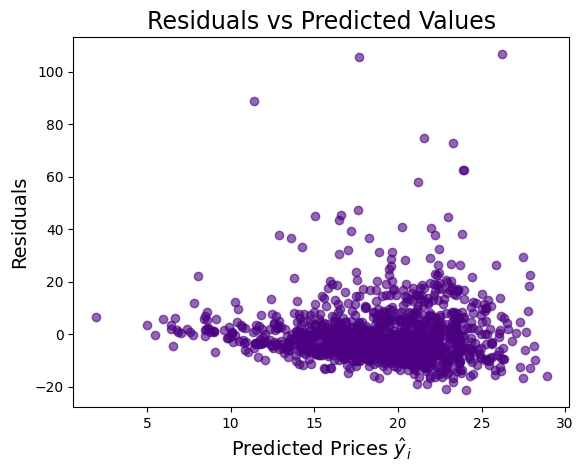

The absolute mean for the residuals of training data is 7.5178


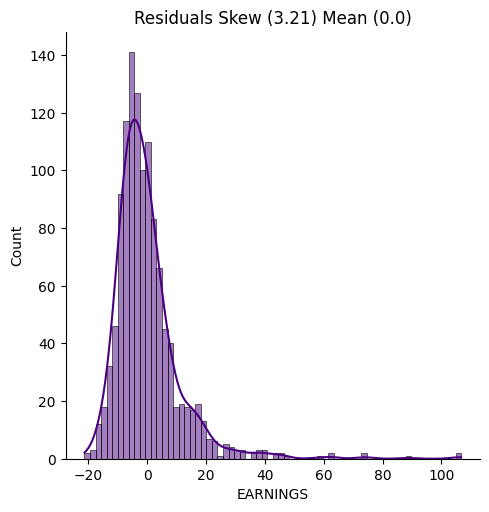

In [100]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_train = mean_absolute_error(y_train, predict_train)
print(f"The absolute mean for the residuals of training data is {mae_train:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

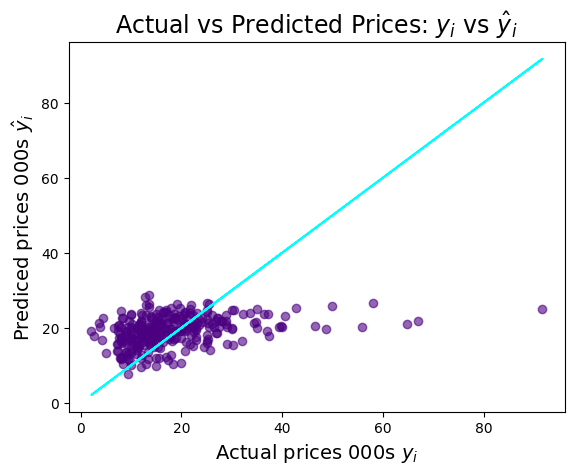

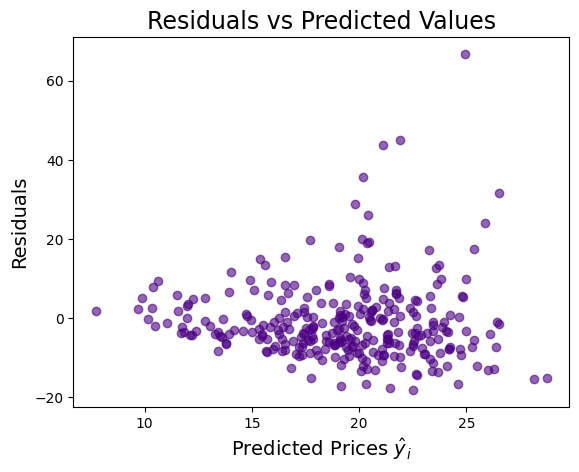

The absolute mean for the residuals of training data is 7.0488


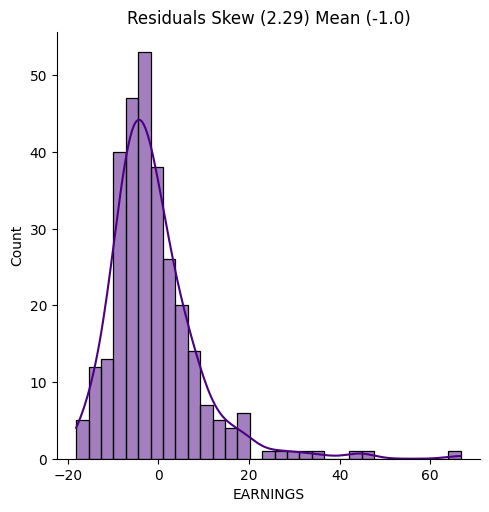

In [101]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Use Model to Make a Prediction

How much can someone with the Schooling years and work experience expect to earn in 2011?

In [110]:
schooling_year = 12
work_experience = 3

In [111]:
new_features = pd.DataFrame(columns=['S', 'EXP'], data=[[schooling_year, work_experience]])
new_prediction = regr.predict(new_features)[0]
print(f"A person with schooling of {schooling_year} years & work experience of {work_experience} years is predicted to have earnings of ${new_prediction:.2f} per hour")

A person with schooling of 12 years & work experience of 3 years is predicted to have earnings of $10.62 per hour
